<a href="https://colab.research.google.com/github/viurdaneta/regression/blob/master/fish_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Fish.csv']))

In [ ]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [ ]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


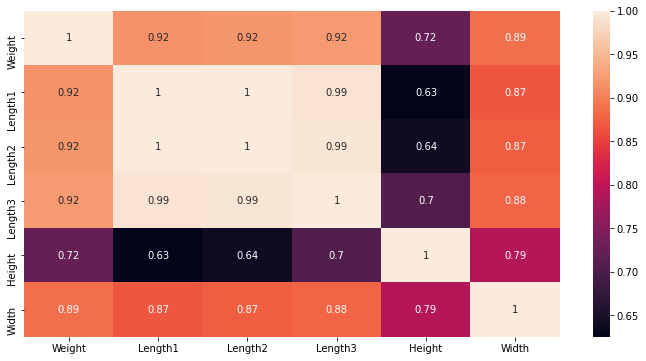

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

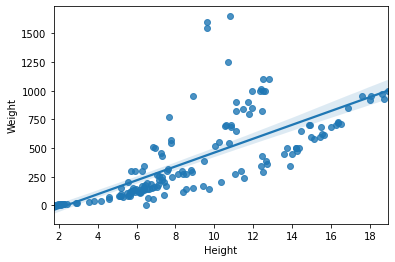

In [ ]:
sns.regplot(df["Height"], df["Weight"])

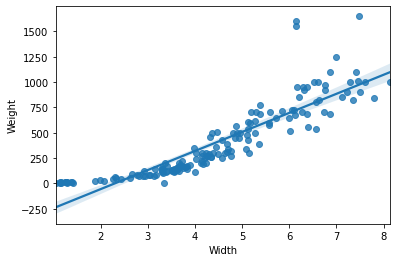

In [ ]:
sns.regplot(df["Width"], df["Weight"])

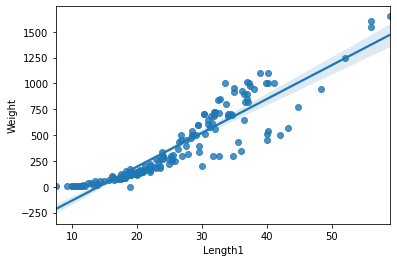

In [ ]:
sns.regplot(df["Length1"], df["Weight"])

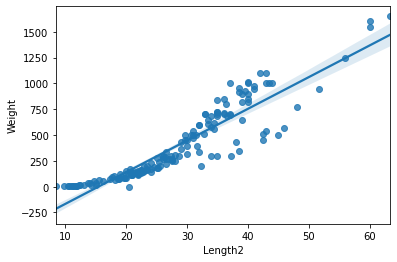

In [ ]:
sns.regplot(df["Length2"], df["Weight"])

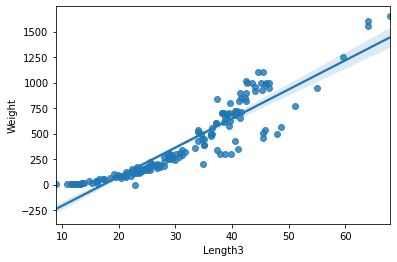

In [ ]:
sns.regplot(df["Length3"], df["Weight"])

In [ ]:
df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

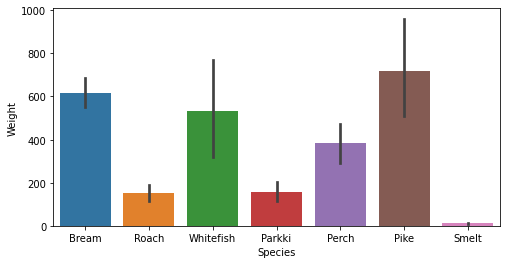

In [ ]:
fig = plt.figure(figsize=(8,4))
sns.barplot(x=df["Species"], y=df["Weight"])

In [ ]:
dummy_species = pd.get_dummies(df["Species"], prefix="Species")
df = pd.concat([df, dummy_species], axis=1)
df.drop(labels="Species", axis=1, inplace=True)
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


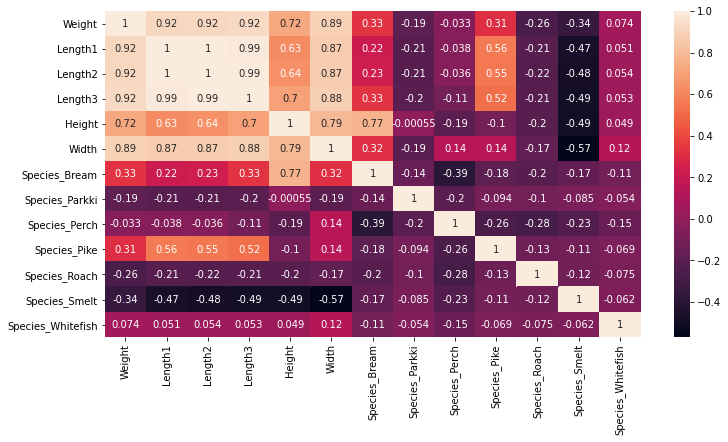

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df[["Length1"]], df[["Weight"]], train_size=0.7, random_state=100)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
train_X_poly = poly.fit_transform(train_X)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train_y_poly = model.fit(train_X_poly, train_y)
print(model.coef_, model.intercept_)

[[ 0.00000000e+00 -1.74166008e+01  1.50486225e+00 -1.29758503e-02]] [14.49457674]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
test_X_poly = poly.fit_transform(test_X)
test_y_pred = model.predict(test_X_poly)

r2_score(test_y, test_y_pred)

0.7723529555898209

In [ ]:
plt.scatter(train_X, train_y, color="Blue")
plt.plot(train_X, model.predict(train_X_poly), color="REd")  

In [ ]:
model.predict(poly.fit_transform([[24.0]]))

array([[283.91865824]])